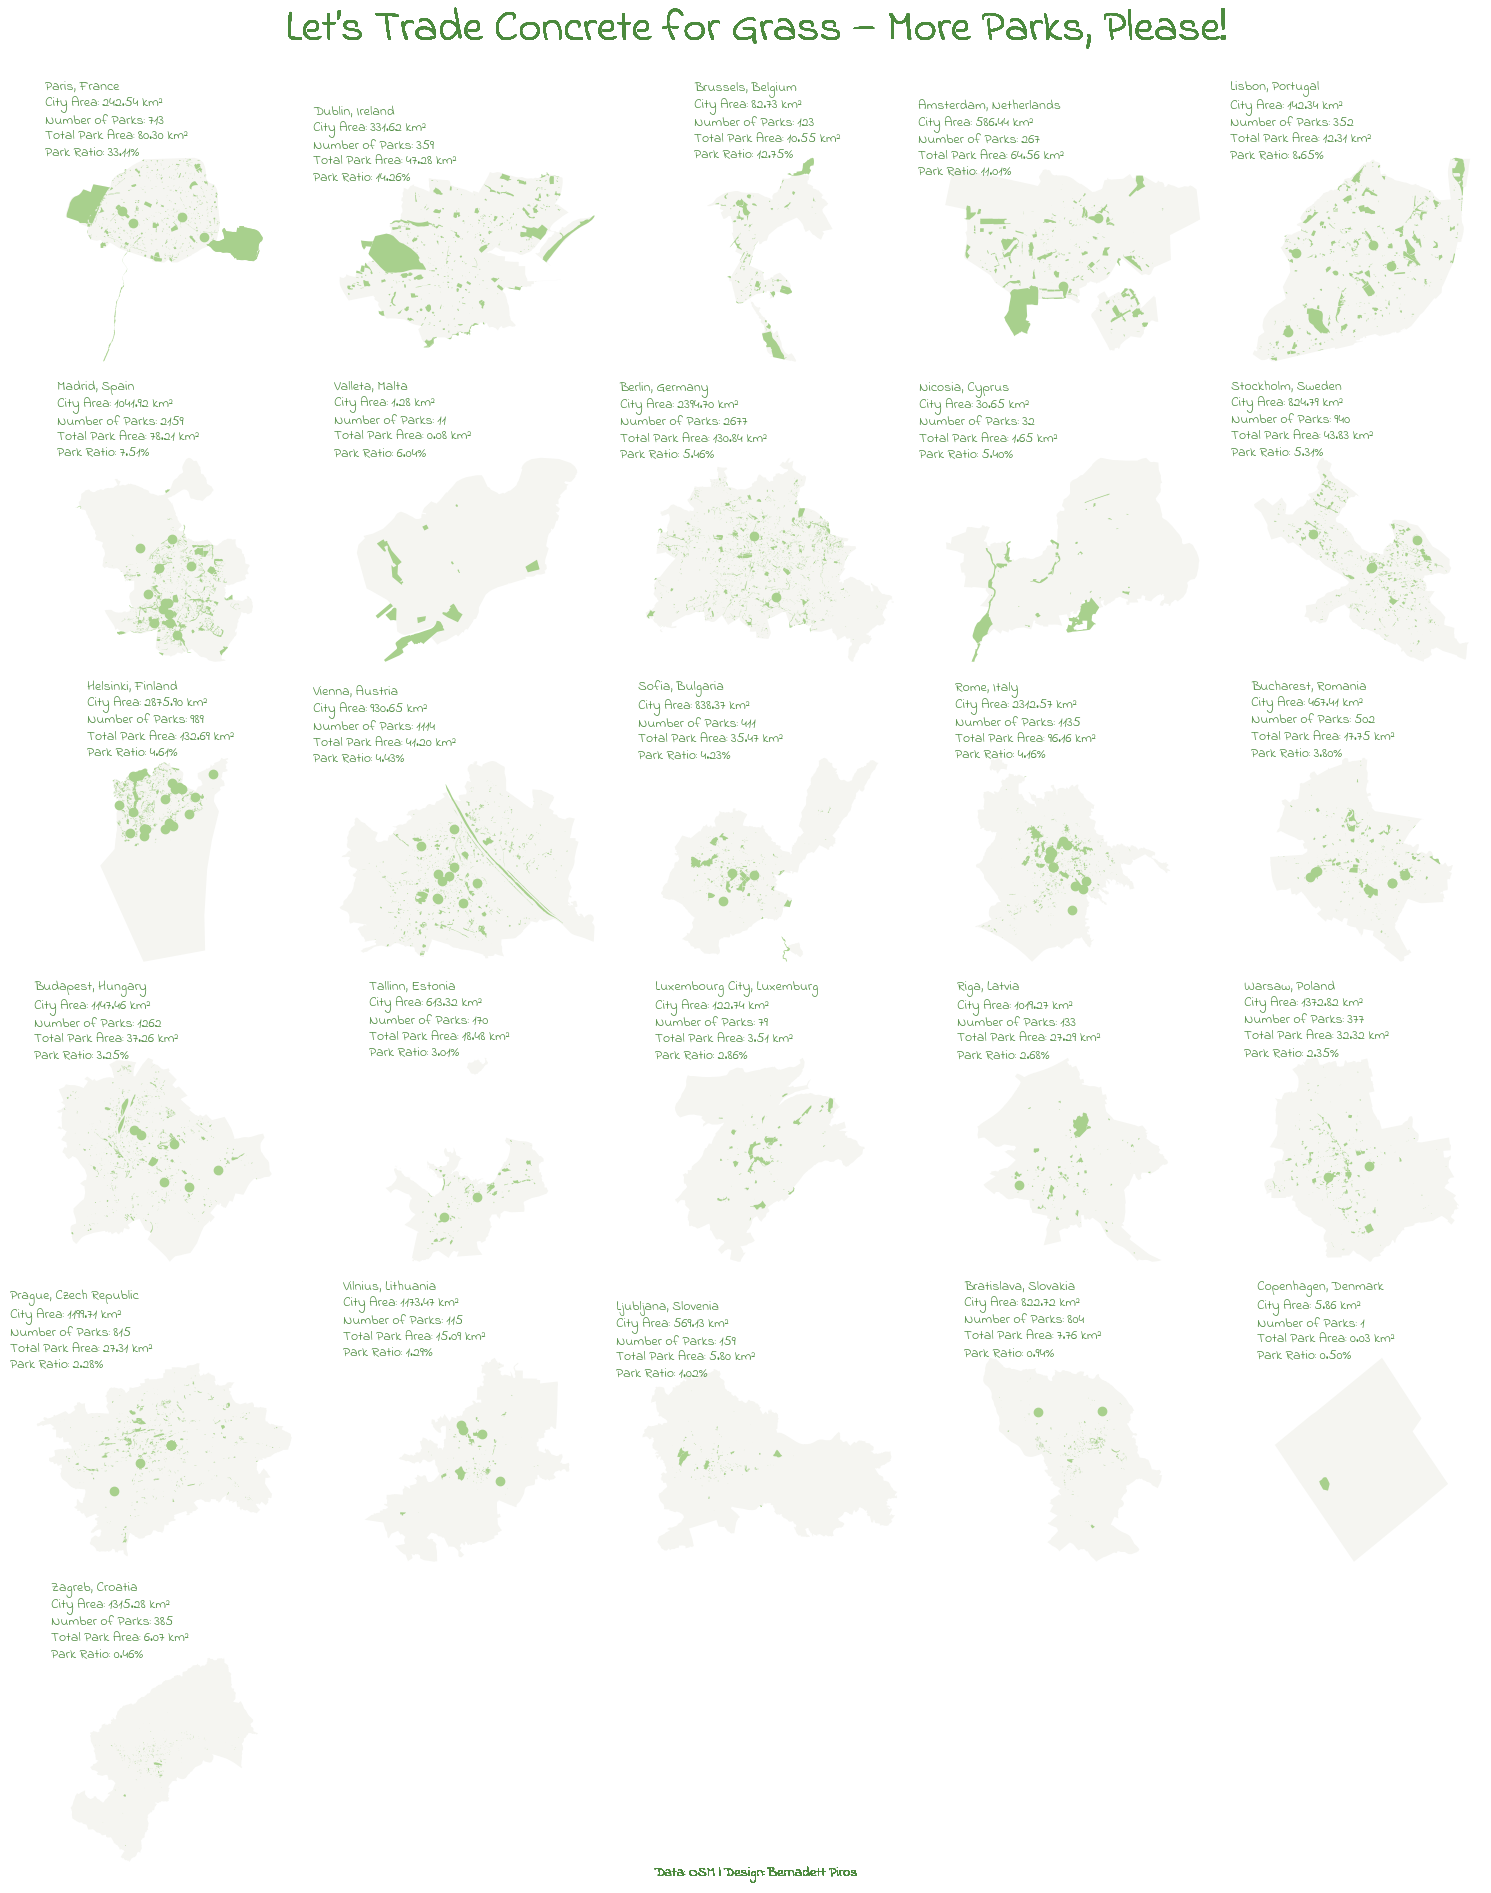

In [18]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

def plot_parks(city_list, cols=5): 
    city_data = []
    # Get data for each city
    for city in city_list:
        # Get city boundary
        gdf_city = ox.geocode_to_gdf(city)
        gdf_city = gdf_city.to_crs(epsg=3395)  
        city_area_km2 = gdf_city.geometry.area.iloc[0] / 1000000  

        # Get parks 
        gdf_parks = ox.features_from_place(city, tags={"leisure": "park"})
        gdf_parks = gdf_parks.to_crs(epsg=3395)  

        # Get park stats
        num_parks = len(gdf_parks)
        park_area_km2 = gdf_parks.geometry.area.sum() / 1000000 
        park_ratio = park_area_km2 / city_area_km2 
        city_data.append((city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio))        

    # Sort cities descending by park ratio 
    city_data.sort(key=lambda x: x[-1], reverse=True)

    # Dynamic grid 
    num_cities = len(city_data)
    rows = (num_cities // cols) + (num_cities % cols > 0)  

    # Create figure and axes
    fig, axs = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows), constrained_layout=True)
    axs = axs.flatten()      

    for i, (city, gdf_city, gdf_parks, city_area_km2, num_parks, park_area_km2, park_ratio) in enumerate(city_data):      
        ax = axs[i]

        # Plot city boundaries
        gdf_city.plot(ax=ax, facecolor="#f5f5f1")

        # Plot parks
        gdf_parks.plot(ax=ax, color="#A8D08D")

        # Add text
        info_text = (
            f"{city}\n"
            f"City Area: {city_area_km2:.2f} km²\n"
            f"Number of Parks: {num_parks}\n"
            f"Total Park Area: {park_area_km2:.2f} km²\n"
            f"Park Ratio: {park_ratio:.2%}"
        )
        ax.text(-0.05, 1.3, s=info_text, font=font, color="#4B8A3D", weight="bold", va="top", transform=ax.transAxes)

        fig.text(0.5, 1.02, "Let’s Trade Concrete for Grass — More Parks, Please!",
                 font=font, color="#4B8A3D", size=32, ha="center")

        fig.text(0.5, 0, "Data: OSM | Design: Bernadett Piros", font=font, color="#4B8A3D", ha="center")
        
        ax.axis("off")

    # Hide unused axes
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)    

    plt.show()

    #plt.savefig("OSM_EU_capitals_parks", dpi=300, bbox_inches='tight', pad_inches=0.2)

city_list = [
    "Vienna, Austria", 
    "Brussels, Belgium", 
    "Sofia, Bulgaria", 
    "Zagreb, Croatia", 
    "Nicosia, Cyprus", 
    "Prague, Czech Republic", 
    "Copenhagen, Denmark", 
    "Tallinn, Estonia", 
    "Helsinki, Finland", 
    "Paris, France", 
    "Berlin, Germany",  
    #"Athens, Greece", # Nominatim cannot geocode
    "Budapest, Hungary",  
    "Dublin, Ireland", 
    "Rome, Italy",  
    "Riga, Latvia", 
    "Vilnius, Lithuania", 
    "Luxembourg City, Luxemburg", 
    "Valleta, Malta", 
    "Amsterdam, Netherlands", 
    "Warsaw, Poland", 
    "Lisbon, Portugal",
    "Bucharest, Romania", 
    "Bratislava, Slovakia", 
    "Ljubljana, Slovenia", 
    "Madrid, Spain", 
    "Stockholm, Sweden" 
]

plot_parks(city_list, cols=5)  